In [1]:
import cv2 #Cargamos OpenCV
import matplotlib.pyplot as plt
import numpy as np

Importaremos la Imagen y la colocamos en formato RGB

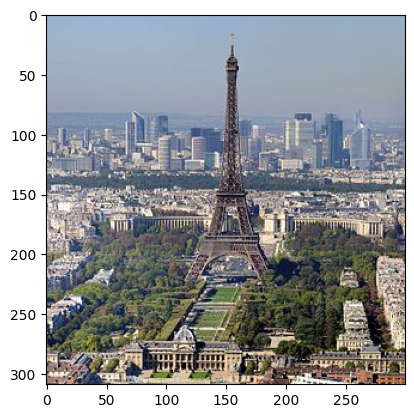

In [2]:
imagen = cv2.imread("paris.jpg") # Ojo,  las imagenes se almacenan en BGR
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.show()

PROBLEMA 1:
#### Definiremos la funcion para seleccionar el filtro de color de la imagen

In [3]:
def seleccion_color(imagen, color):
    if color == 1:
        # Activar únicamente el canal azul
        imagen[:, :, 0] = 0  # Desactivar canal verde
        imagen[:, :, 1] = 0  # Desactivar canal rojo
    elif color == 2:
        # Activar únicamente el canal verde
        imagen[:, :, 0] = 0  # Desactivar canal azul
        imagen[:, :, 2] = 0  # Desactivar canal rojo
    elif color == 3:
        # Activar únicamente el canal rojo
        imagen[:, :, 1] = 0  # Desactivar canal verde
        imagen[:, :, 2] = 0  # Desactivar canal azul
    elif color == 10:
        # Activar únicamente los canales rojo y verde
        imagen[:, :, 0] = 0  # Desactivar canal azul
    elif color == 20:
        # Activar únicamente los canales verde y azul
        imagen[:, :, 2] = 0  # Desactivar canal rojo
    elif color == 30:
        # Activar únicamente los canales azul y rojo
        imagen[:, :, 1] = 0  # Desactivar canal verde
    
    return imagen


Haciendo uso de la función con la imagen importada

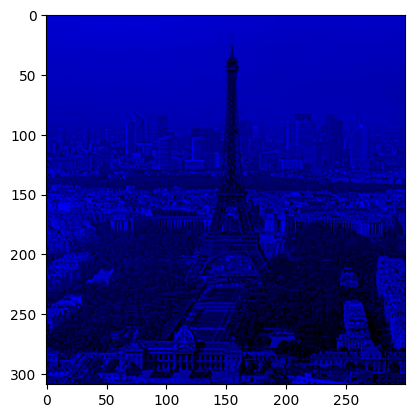

In [4]:
# Activar únicamente el color azul
imagen_azul = seleccion_color(imagen.copy(), 1)
cv2.imshow('Imagen Azul', imagen_azul)
plt.imshow(imagen_azul)
plt.show()

PROBLEMA 2:
#### Construcción de Imagen a partir de 3 imagenes en escala de Grises

In [5]:
def crear_color(imagen_gris1, imagen_gris2, imagen_gris3):
    # Obtener las dimensiones de las imágenes en escala de grises
    altura, ancho = imagen_gris1.shape

    # Crear una matriz de ceros con las dimensiones de las imágenes en escala de grises
    imagen_color = np.zeros((altura, ancho, 3), dtype=np.uint8)

    # Asignar las imágenes en escala de grises a los canales de color correspondientes
    imagen_color[:,:,0] = imagen_gris3  # Canal azul
    imagen_color[:,:,1] = imagen_gris2  # Canal verde
    imagen_color[:,:,2] = imagen_gris1  # Canal rojo

    return imagen_color

Ejemplo de uso con las imagenes dadas en el Laboratorio

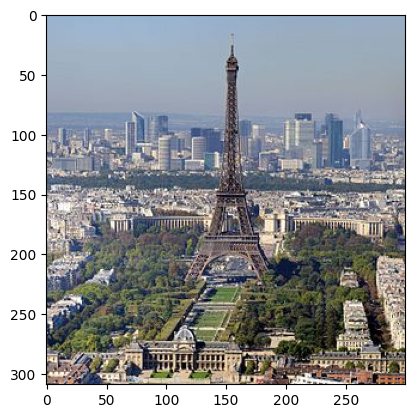

In [6]:
# Ejemplo de uso
imagen_gris1 = cv2.imread('imagen3_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
imagen_gris2 = cv2.imread('imagen3_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen_gris3 = cv2.imread('imagen3_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)

# Construir la imagen original a color
imagen_color = crear_color(imagen_gris1, imagen_gris2, imagen_gris3)

imagen_color2 = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

# Mostrar la imagen a color
plt.imshow(imagen_color)
plt.show()

PROBLEMA 3
##### Crear a partir de una imagen original, 3 imagenes en escala de grises color azul, verde, rojo

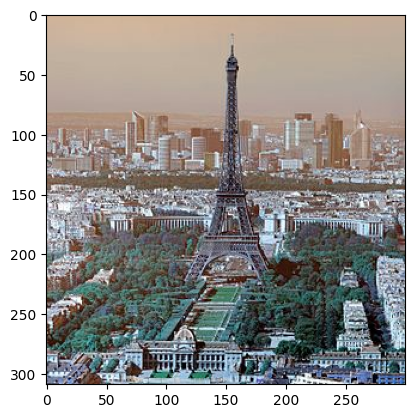

In [7]:
imagenNueva = cv2.imread("paris.jpg") # Ojo,  las imagenes se almacenan en BGR
plt.imshow(imagenNueva)
plt.show()

In [8]:
def grayscale_3d(imagex):
    # Obtener cada canal de color de la imagen original
    # dividir una imagen en sus canales de color individuales
    # cada matriz representa uno de los canales de color de la imagen original.
    canal_azul, canal_verde, canal_rojo = cv2.split(imagex)

    # Expandir cada canal a tres dimensiones para obtener imágenes en escala de grises en 3D
    gray_r = cv2.merge((canal_rojo, canal_rojo, canal_rojo))
    gray_g = cv2.merge((canal_verde, canal_verde, canal_verde))
    gray_b = cv2.merge((canal_azul, canal_azul, canal_azul))

    return gray_r, gray_g, gray_b

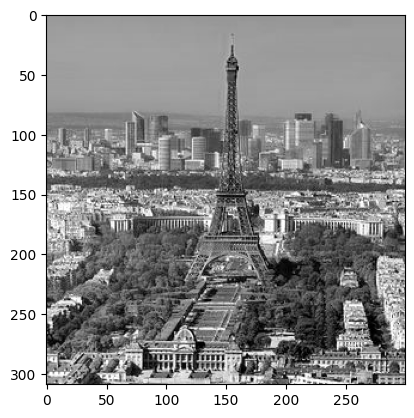

In [9]:
# Convertir la imagen RGB a escala de grises en tres dimensiones
salida_gray_rojo, salida_gray_verde, salida_gray_azul = grayscale_3d(imagenNueva)

# Guardar las imágenes en escala de grises en 3D en archivos separados
cv2.imwrite('imagen3_salida_gray_rojo.jpg', salida_gray_rojo)
cv2.imwrite('imagen3_salida_gray_verde.jpg', salida_gray_verde)
cv2.imwrite('imagen3_salida_gray_azul.jpg', salida_gray_azul)


# Mostrar las imágenes de escala de grises
plt.imshow(salida_gray_rojo)
plt.show()

PROBLEMA 4
#### Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funcionesde opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribuci´on

In [10]:
def calcular_histograma(IMG):
    # Calcular el histograma de cada canal de color
    hist_rojo, _ = np.histogram(IMG[:,:,0], bins=256, range=(0, 256))
    hist_verde, _ = np.histogram(IMG[:,:,1], bins=256, range=(0, 256))
    hist_azul, _ = np.histogram(IMG[:,:,2], bins=256, range=(0, 256))

    # Calcular el histograma de escala de grises utilizando promedio aritmético
    imagen_gris = np.mean(IMG, axis=2, dtype=np.uint8)
    hist_gris, _ = np.histogram(imagen_gris, bins=256, range=(0, 256))

    # Calcular la media de la distribución del histograma de escala de grises
    media_gris = np.mean(hist_gris)

    return hist_rojo, hist_verde, hist_azul, hist_gris, media_gris


In [11]:
def mostrar_histogramas(imagenCompleta):
    # Calcular los histogramas y la media de la escala de grises
    hist_rojo, hist_verde, hist_azul, hist_gris, media_gris = calcular_histograma(imagenCompleta)

    # Mostrar los histogramas y la línea vertical de la media
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(hist_rojo, color='red')
    plt.axvline(x=media_gris, color='black', linestyle='--')
    plt.title('Histograma - Canal Rojo')

    plt.subplot(2, 2, 2)
    plt.plot(hist_verde, color='green')
    plt.axvline(x=media_gris, color='black', linestyle='--')
    plt.title('Histograma - Canal Verde')

    plt.subplot(2, 2, 3)
    plt.plot(hist_azul, color='blue')
    plt.axvline(x=media_gris, color='black', linestyle='--')
    plt.title('Histograma - Canal Azul')

    plt.subplot(2, 2, 4)
    plt.plot(hist_gris, color='gray')
    plt.axvline(x=media_gris, color='black', linestyle='--')
    plt.title('Histograma - Escala de Grises')

    plt.tight_layout()
    plt.show()



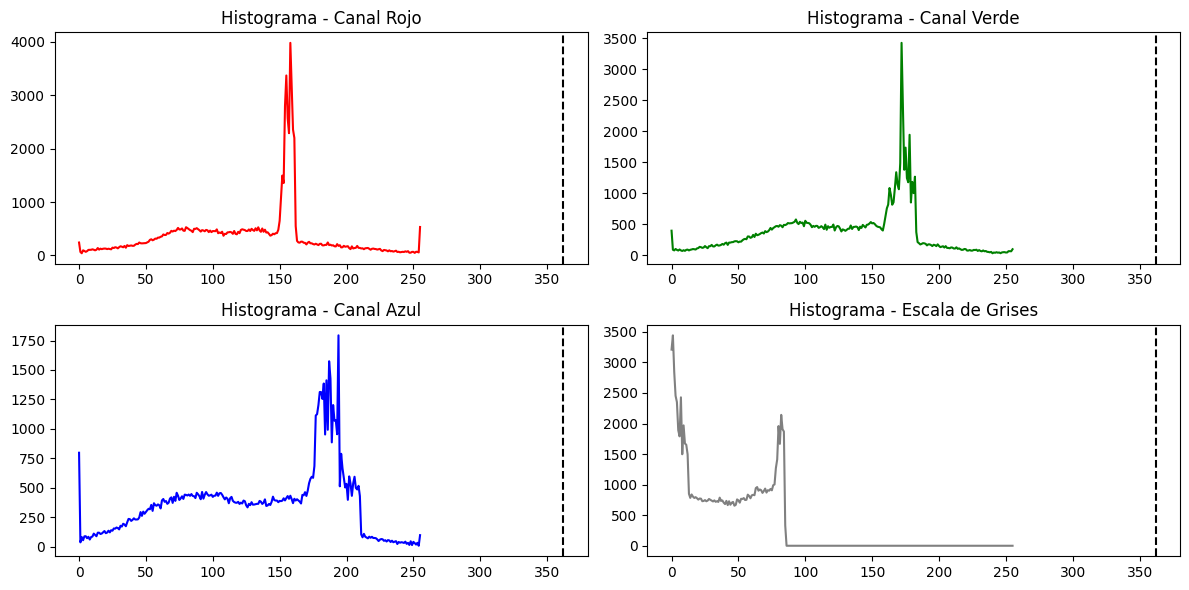

In [12]:
# Ejemplo de uso
imagen_Hist = plt.imread('paris.jpg')

# Mostrar los histogramas de la imagen
mostrar_histogramas(imagen_Hist)